<a href="https://colab.research.google.com/github/BrayanMachacca/Portafolio/blob/main/Proyecto_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
anime = pd.read_csv("anime-list.csv")
anime.head()

,Unnamed: 0,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
0,0,Shingeki no Kyojin,Wit Studio,"Gore, Military, Survival","Action, Drama",Manga,8.53,2013.0,"Centuries ago, mankind was slaughtered to near...",Shounen,Finished,25.0,24.0,3.4M
1,1,Death Note,Madhouse,Psychological,"Supernatural, Suspense",Manga,8.63,2006.0,"Brutal murders, petty thefts, and senseless vi...",Shounen,Finished,37.0,23.0,3.4M
2,2,Fullmetal Alchemist: Brotherhood,Bones,Military,"Action, Adventure, Drama, Fantasy",Manga,9.14,2009.0,After a horrific alchemy experiment goes wrong...,Shounen,Finished,64.0,24.0,2.9M
3,3,Boku no Hero Academia,Bones,"School, Super Power",Action,Manga,7.95,2016.0,"The appearance of ""quirks,"" newly discovered s...",Shounen,Finished,13.0,24.0,2.6M
4,4,Naruto,Studio Pierrot,Martial Arts,"Action, Adventure, Fantasy",Manga,7.97,2002.0,"Moments prior to Naruto Uzumaki's birth, a hug...",Shounen,Finished,220.0,23.0,2.5M


In [ ]:
anime.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
anime.describe()

,rating,year,eps,eps_avg_duration_in_min
count,1812.000000,2949.000000,2890.000000,2950.000000
mean,7.043311,2007.264157,43.062284,18.194576
std,0.776097,12.151285,75.149153,8.019819
min,2.930000,1963.000000,2.000000,0.000000
25%,6.490000,2002.000000,13.000000,12.000000
50%,7.050000,2011.000000,26.000000,23.000000
75%,7.550000,2016.000000,51.000000,24.000000
max,9.140000,2023.000000,1787.000000,50.000000


In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     3005 non-null   object 
 1   studio                   3005 non-null   object 
 2   theme                    3005 non-null   object 
 3   tags                     2470 non-null   object 
 4   source                   2510 non-null   object 
 5   rating                   1812 non-null   float64
 6   year                     2949 non-null   float64
 7   synopsis                 2315 non-null   object 
 8   demographic              3005 non-null   object 
 9   status                   2981 non-null   object 
 10  eps                      2890 non-null   float64
 11  eps_avg_duration_in_min  2950 non-null   float64
 12  rated_by                 3005 non-null   object 
dtypes: float64(4), object(9)
memory usage: 305.3+ KB


In [ ]:
perdidos = anime.isna().sum()
total_perdidos = perdidos.sum()

print(f"The dataframe has {total_perdidos} cells with NaN value")
perdidos

The dataframe has 3163 cells with NaN value


name                          0
studio                        0
theme                         0
tags                        535
source                      495
rating                     1193
year                         56
synopsis                    690
demographic                   0
status                       24
eps                         115
eps_avg_duration_in_min      55
rated_by                      0
dtype: int64

In [ ]:
# Retrieving the columns that hold numerical values
numerical_cols = list(
    filter(lambda column: 
               anime[column].dtype == 'float64' or anime[column].dtype == 'int32', 
           anime.columns
          ))

for column in numerical_cols:
    column = str(column).strip()

numerical_cols

['rating', 'year', 'eps', 'eps_avg_duration_in_min']

In [ ]:
np.random.seed(16)

for column in numerical_cols:
    minimum = anime[column].min()
    maximum = anime[column].max()
    
    if column != "rating":
        minimum = int(minimum)
        maximum = int(maximum)
    
    placeholder = np.random.choice(np.random.randint(minimum, maximum, size=(1)))
    
    anime[column].fillna(placeholder, inplace=True)
    
    if column != "rating":
        anime[column] = anime[column].astype(int)

In [ ]:
units = [value[-1] for value in anime.rated_by.values]
set(units)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'K', 'M'}

In [ ]:
def fix_zeros(value:str,symbol:str,zeros_count:int):
    copy = value.replace(symbol,"")
    value = value.replace(".","")
    dot_index = copy.index(".") if "." in copy else 0
    
    # if there is no dot in the value
    if dot_index <= 0:
        return value.replace(symbol, "0" * (zeros_count - len(copy) + 1))

    else:
        after_dot_digits = len(copy[dot_index+1:])
        return value.replace(symbol, "0" * (zeros_count - after_dot_digits))

In [ ]:
k_mask = anime.rated_by.str.contains("K")
m_mask = anime.rated_by.str.contains("M")

In [ ]:
k_values_copy = anime.loc[k_mask, "rated_by"].copy()
m_values_copy = anime.loc[m_mask, "rated_by"].copy()

In [ ]:
anime.loc[k_mask, "rated_by"] = k_values_copy.map(lambda value: fix_zeros(str(value).strip(),"K",3))

In [ ]:
anime.loc[m_mask, "rated_by"] = m_values_copy.map(lambda value: fix_zeros(str(value).strip(),"M",6))

In [ ]:
anime.rated_by = anime.rated_by.astype(int)

In [ ]:
for column in anime.columns:
    if column not in numerical_cols:
        anime[column].fillna("unknown",inplace=True)

In [ ]:
anime.isna().sum()

name                       0
studio                     0
theme                      0
tags                       0
source                     0
rating                     0
year                       0
synopsis                   0
demographic                0
status                     0
eps                        0
eps_avg_duration_in_min    0
rated_by                   0
dtype: int64

In [ ]:
def lower_case_value(*columns):
    for column in columns:
        anime[column] = anime[column].map(lambda value: str(value).lower())        
lower_case_value("tags","theme","name")
anime[["name","tags","theme"]].head()

,name,tags,theme
0,shingeki no kyojin,"action, drama","gore, military, survival"
1,death note,"supernatural, suspense",psychological
2,fullmetal alchemist: brotherhood,"action, adventure, drama, fantasy",military
3,boku no hero academia,action,"school, super power"
4,naruto,"action, adventure, fantasy",martial arts


In [ ]:
def extract_cell_value(column_name:str) -> set:
    """
    For a given column with string values separated by a comma, 
    each cell value(s) will be retrieved and then returned as a set.
    """
    result = set()
    column = anime[column_name].astype(str)
    
    for cell in column:
        for value in cell.split(","):
            result.add(str(value).strip())
            
    return result
tags_set = extract_cell_value("tags")
themes_set = extract_cell_value("theme")
# Creating a DataFrame for tags and theme
tags_data = pd.DataFrame(index=anime.name, columns=tags_set)
theme_data = pd.DataFrame(index=anime.name, columns=themes_set)
anime.head()

,name,studio,theme,tags,source,rating,year,synopsis,demographic,status,eps,eps_avg_duration_in_min,rated_by
0,shingeki no kyojin,Wit Studio,"gore, military, survival","action, drama",Manga,8.53,2013,"Centuries ago, mankind was slaughtered to near...",Shounen,Finished,25,24,3400000
1,death note,Madhouse,psychological,"supernatural, suspense",Manga,8.63,2006,"Brutal murders, petty thefts, and senseless vi...",Shounen,Finished,37,23,3400000
2,fullmetal alchemist: brotherhood,Bones,military,"action, adventure, drama, fantasy",Manga,9.14,2009,After a horrific alchemy experiment goes wrong...,Shounen,Finished,64,24,2900000
3,boku no hero academia,Bones,"school, super power",action,Manga,7.95,2016,"The appearance of ""quirks,"" newly discovered s...",Shounen,Finished,13,24,2600000
4,naruto,Studio Pierrot,martial arts,"action, adventure, fantasy",Manga,7.97,2002,"Moments prior to Naruto Uzumaki's birth, a hug...",Shounen,Finished,220,23,2500000


In [ ]:
tags_data.head()

,love,avant,unknown,drama,gourmet,girls,of,sports,fantasy,slice,...,suspense,romance,life,adventure,ecchi,garde,action,comedy,mystery,sci-fi
name,,,,,,,,,,,,,,,,,,,,,
shingeki no kyojin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
death note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fullmetal alchemist: brotherhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
boku no hero academia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
naruto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def encode_dataframe(column_name:str,frame:pd.DataFrame) -> None:
    # for each anime's data
    for line in anime[["name",column_name]].values:
        anime_tags = [str(value).strip() for value in line[1].split(",")]

        # for each tag or frame
        for column in frame.columns:
            if column in anime_tags:
                frame.loc[line[0],column] = 1
            else:
                 frame.loc[line[0],column] = 0
encode_dataframe("tags",tags_data)
tags_data.head()

,love,avant,unknown,drama,gourmet,girls,of,sports,fantasy,slice,...,suspense,romance,life,adventure,ecchi,garde,action,comedy,mystery,sci-fi
name,,,,,,,,,,,,,,,,,,,,,
shingeki no kyojin,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
death note,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
fullmetal alchemist: brotherhood,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
boku no hero academia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
naruto,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
encode_dataframe("theme",theme_data)
theme_data.head()

,josei,visual arts,iyashikei,showbiz,survival,performing arts,idols (female),childcare,psychological,military,...,historical,medical,seinen,cgdct,anthropomorphic,samurai,parody,strategy game,organized crime,vampire
name,,,,,,,,,,,,,,,,,,,,,
shingeki no kyojin,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
death note,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
fullmetal alchemist: brotherhood,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
boku no hero academia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
naruto,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
theme_data.loc["shingeki no kyojin"].value_counts()

0    52
1     3
Name: shingeki no kyojin, dtype: int64

In [ ]:
anime.rename_axis("anime_id",axis="rows", inplace=True)
anime.rename_axis("features", axis="columns", inplace=True)

tags_data.rename_axis("Tags", axis="columns", inplace=True)
theme_data.rename_axis("Themes", axis="columns", inplace=True)

In [ ]:
anime.drop(["tags","theme"], axis=1,inplace=True)

In [ ]:
tags_data.loc[:,["slice",'of','life']].sum()

Tags
slice    376
of       376
life     376
dtype: object

In [ ]:
tags_data["slice of life"] = 0

for index in tags_data.index:
    if tags_data.loc[index, "slice"] == 1:
        tags_data.loc[index, "slice of life"] = 1
tags_data.drop(["slice","of","life"],axis=1,inplace=True)
set(tags_data.columns)

{'action',
 'adventure',
 'avant',
 'boys',
 'comedy',
 'drama',
 'ecchi',
 'fantasy',
 'garde',
 'girls',
 'gourmet',
 'horror',
 'love',
 'mystery',
 'romance',
 'sci-fi',
 'slice of life',
 'sports',
 'supernatural',
 'suspense',
 'unknown'}

In [ ]:
set(theme_data.columns)

{'adult cast',
 'anthropomorphic',
 'cgdct',
 'childcare',
 'combat sports',
 'crossdressing',
 'delinquents',
 'detective',
 'educational',
 'gag humor',
 'gore',
 'harem',
 'high stakes game',
 'historical',
 'idols (female)',
 'idols (male)',
 'isekai',
 'iyashikei',
 'josei',
 'kids',
 'love polygon',
 'magical sex shift',
 'mahou shoujo',
 'martial arts',
 'mecha',
 'medical',
 'military',
 'music',
 'mythology',
 'organized crime',
 'otaku culture',
 'parody',
 'performing arts',
 'pets',
 'psychological',
 'racing',
 'reincarnation',
 'reverse harem',
 'romantic subtext',
 'samurai',
 'school',
 'seinen',
 'shoujo',
 'shounen',
 'showbiz',
 'space',
 'strategy game',
 'super power',
 'survival',
 'team sports',
 'time travel',
 'vampire',
 'video game',
 'visual arts',
 'workplace'}

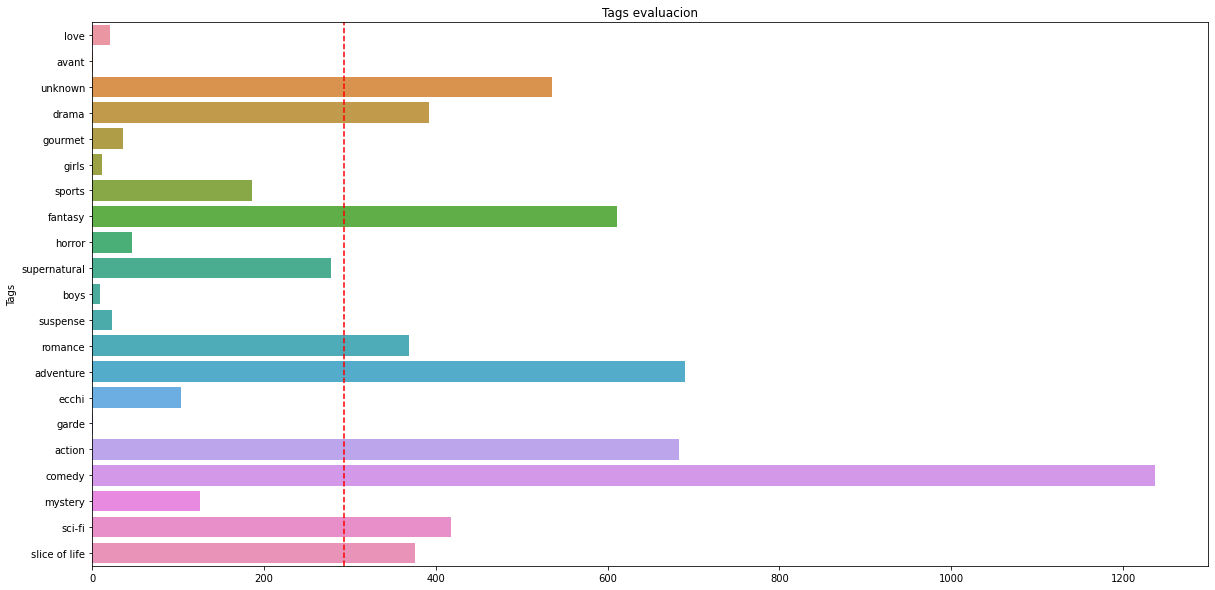

In [ ]:
#Descripcion de datos-Visualizacion
tags = tags_data.sum()
themes = theme_data.sum()
plt.figure(figsize=(20,10))
plt.title("Tags evaluacion")
graph = sns.barplot(x=tags.values, y=tags.index,orient="h")

tags_mean = tags.mean()
graph.axes.axvline(tags_mean, ls="--", color="red", label="mean")

plt.savefig("eva.jpg")

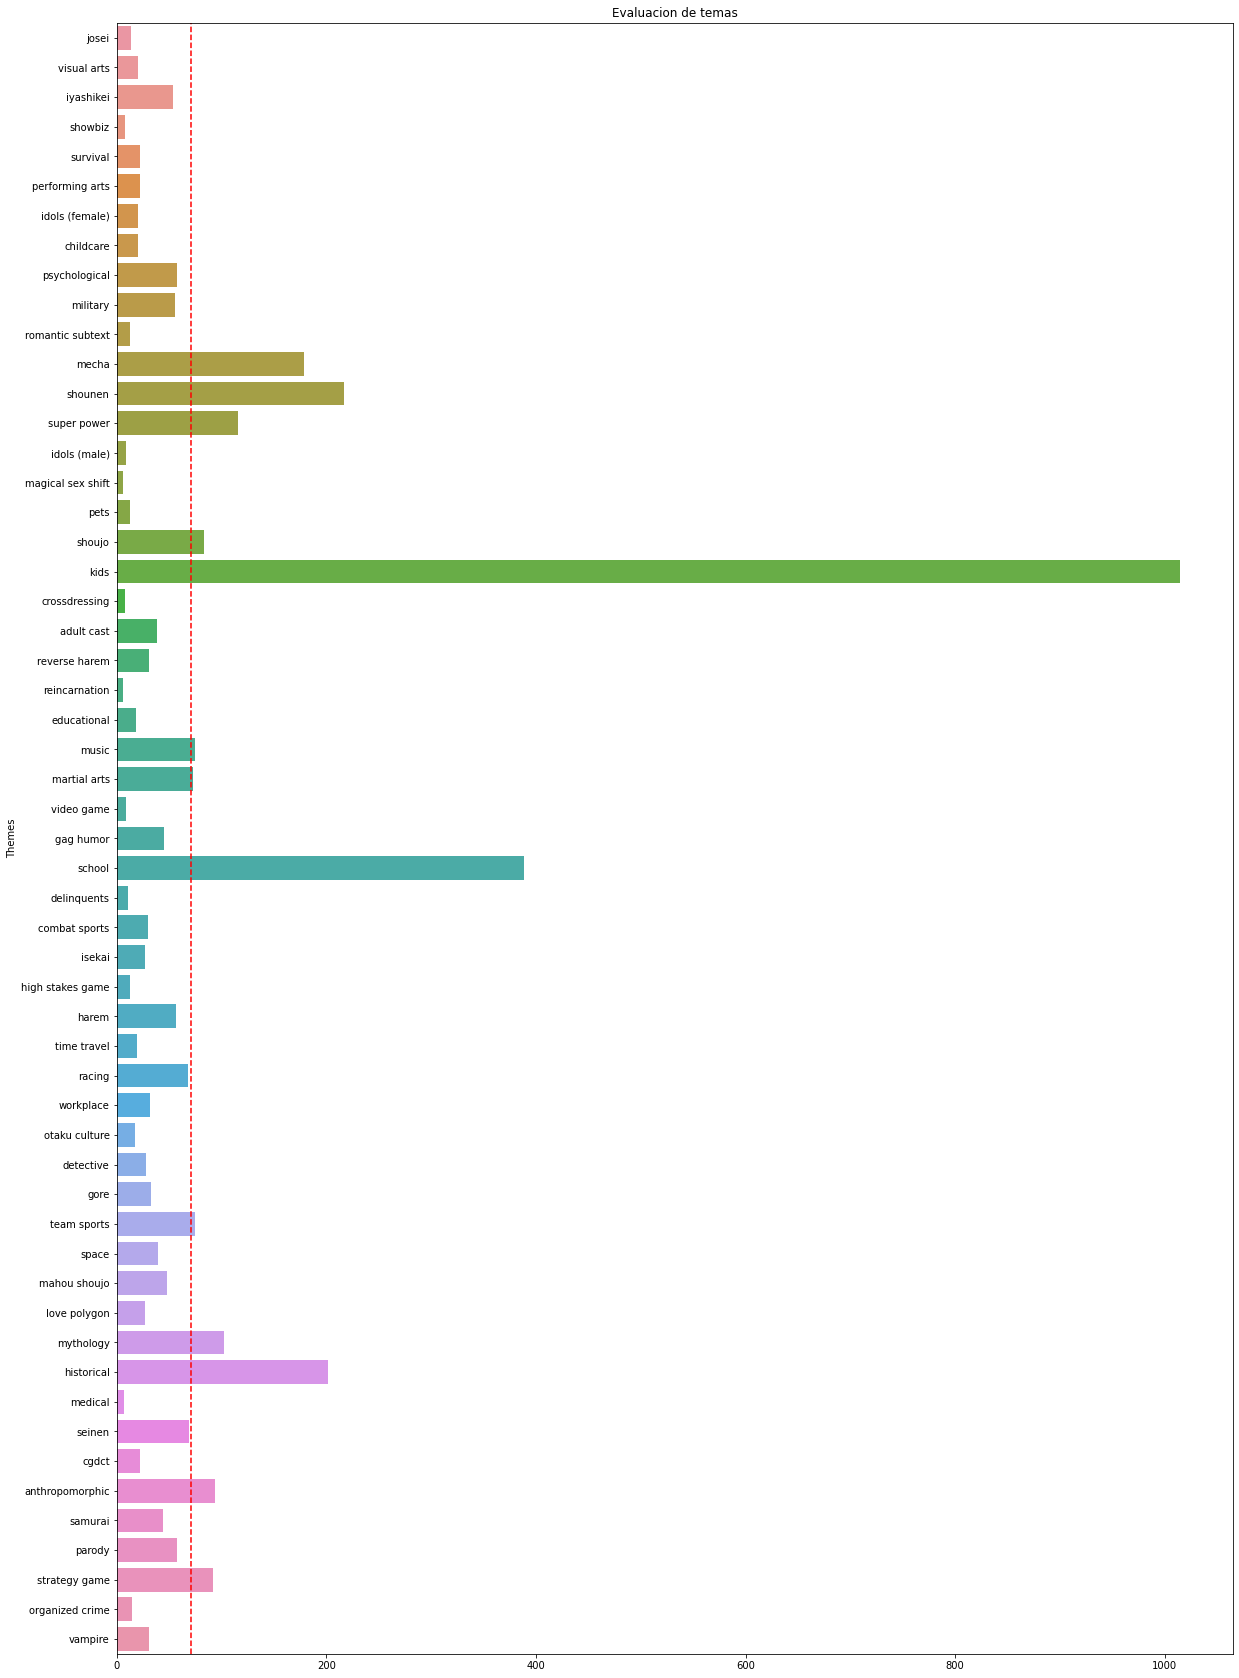

In [ ]:
plt.figure(figsize=(20,30))
plt.title("Evaluacion de temas")
graph = sns.barplot(x=themes.values, y=themes.index,orient="h")

themes_mean = themes.mean()
graph.axes.axvline(themes_mean, ls="--", c="red")

plt.savefig("eva2.jpg")

In [ ]:
under_average_themes =  [{"theme":theme, "count":theme_count} for theme, theme_count in zip(themes.index, themes.values) if theme_count < themes_mean]
under_average_themes[:5]

[{'count': 14, 'theme': 'josei'},
 {'count': 20, 'theme': 'visual arts'},
 {'count': 54, 'theme': 'iyashikei'},
 {'count': 8, 'theme': 'showbiz'},
 {'count': 22, 'theme': 'survival'}]

In [ ]:
average_themes = [{"theme":theme, "count":theme_count} for theme, theme_count in zip(themes.index, themes.values) if theme_count >= themes_mean]
average_themes[:5]

[{'count': 179, 'theme': 'mecha'},
 {'count': 217, 'theme': 'shounen'},
 {'count': 116, 'theme': 'super power'},
 {'count': 83, 'theme': 'shoujo'},
 {'count': 1014, 'theme': 'kids'}]

In [ ]:
tags_under_mean = [{"tag":tag, "count":tag_count} for tag, tag_count in zip(tags.index, tags.values) if tag_count < tags_mean]
tags_under_mean[:5]

[{'count': 21, 'tag': 'love'},
 {'count': 1, 'tag': 'avant'},
 {'count': 36, 'tag': 'gourmet'},
 {'count': 12, 'tag': 'girls'},
 {'count': 186, 'tag': 'sports'}]

In [ ]:
average_tags = [{"tag":tag, "count":tag_count} for tag, tag_count in zip(tags.index, tags.values) if tag_count >= tags_mean]
average_tags[:5]

[{'count': 535, 'tag': 'unknown'},
 {'count': 392, 'tag': 'drama'},
 {'count': 611, 'tag': 'fantasy'},
 {'count': 369, 'tag': 'romance'},
 {'count': 690, 'tag': 'adventure'}]

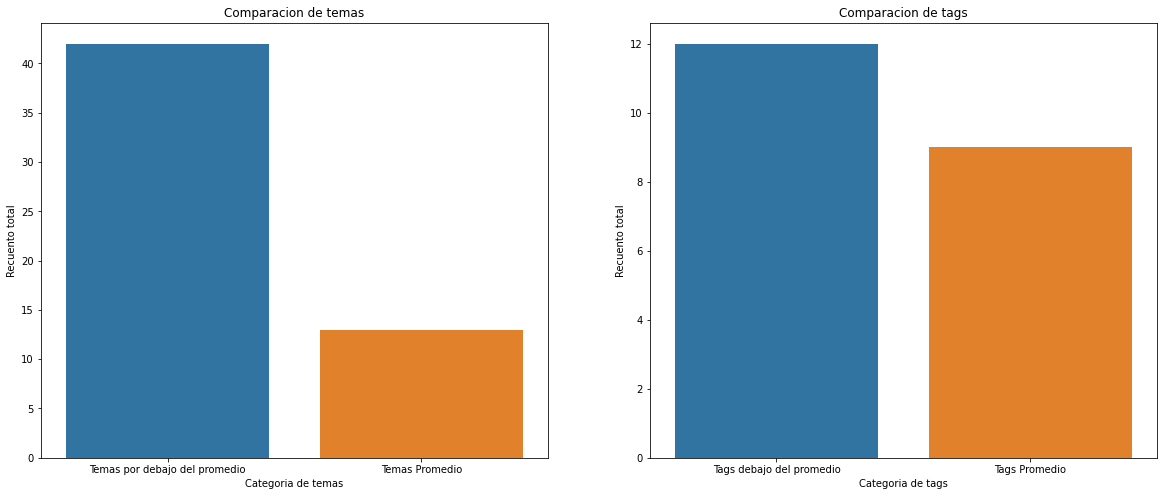

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

ax[0].set_title("Comparacion de temas")
ax[0].set_xlabel("Categoria de temas")
ax[0].set_ylabel("Recuento total")

ax[1].set_title("Comparacion de tags")
ax[1].set_xlabel("Categoria de tags")
ax[1].set_ylabel("Recuento total")

sns.barplot(ax=ax[0], x=["Temas por debajo del promedio", "Temas Promedio"], y=[len(under_average_themes), len(average_themes)])
sns.barplot(ax=ax[1], x=["Tags debajo del promedio", "Tags Promedio"], y=[len(tags_under_mean), len(average_tags)])


In [ ]:
for index in anime.index:
    if anime.loc[index,"status"] == "Not" or anime.loc[index,"status"] == "Ished" or anime.loc[index,"status"] == "ished":
        anime.loc[index,"status"] = "Not finished"

In [ ]:
#Rating de visualizaciones
ratings_mean = anime.rating.mean()
raters_mean = anime.rated_by.mean()
ratings_mean, raters_mean

(5.438096505823627, 36614.37104825291)

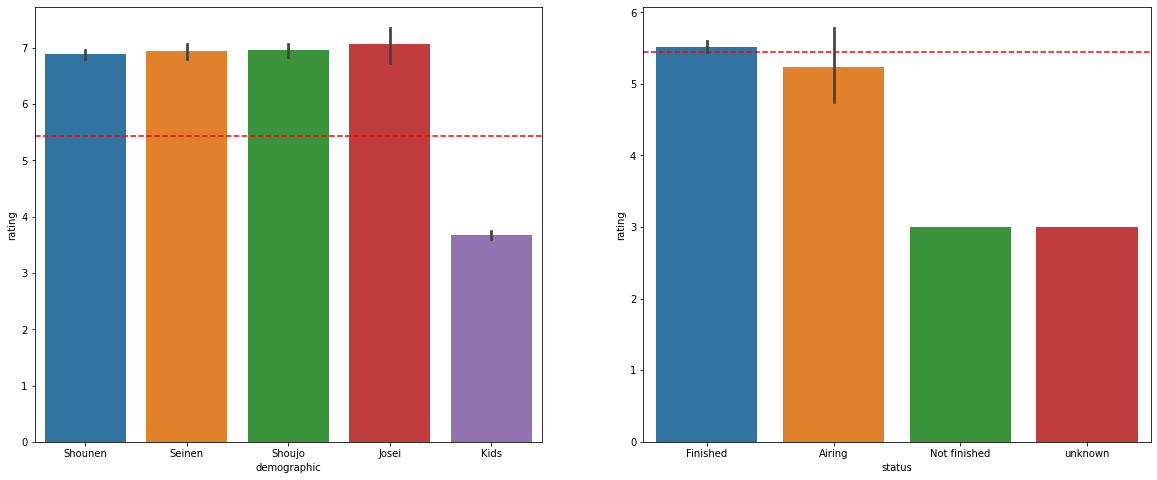

In [ ]:
#Rating de visualizaciones-Graficas
fig, ax = plt.subplots(1,2, figsize=(20,8))

for i in range(2):
    ax[i].axhline(ratings_mean, ls="--", color="r")

sns.barplot(ax=ax[0], x=anime.demographic, y=anime.rating)
sns.barplot(ax=ax[1], x=anime.status, y=anime.rating)
plt.savefig("eva3.jpg")

# Nueva sección

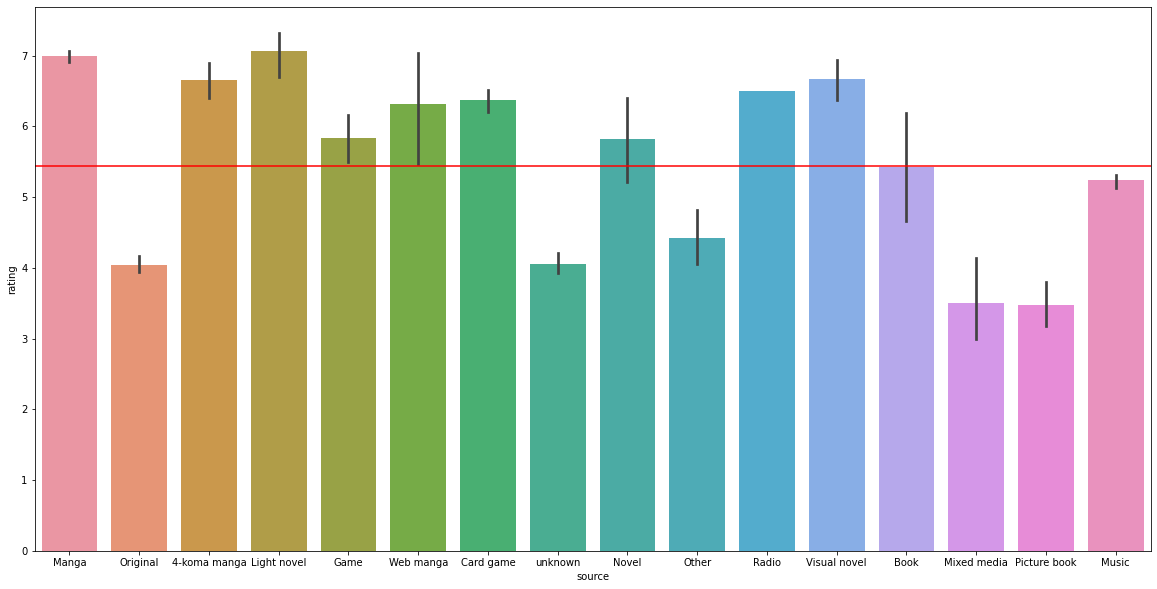

In [ ]:
plt.figure(figsize=(20,10))
graph = sns.barplot(x=anime.source, y=anime.rating)
graph.axes.axhline(ratings_mean, c="r")
plt.savefig("eva4.jpg")

In [ ]:
anime.columns

Index(['name', 'studio', 'source', 'rating', 'year', 'synopsis', 'demographic',
       'status', 'eps', 'eps_avg_duration_in_min', 'rated_by'],
      dtype='object', name='features')

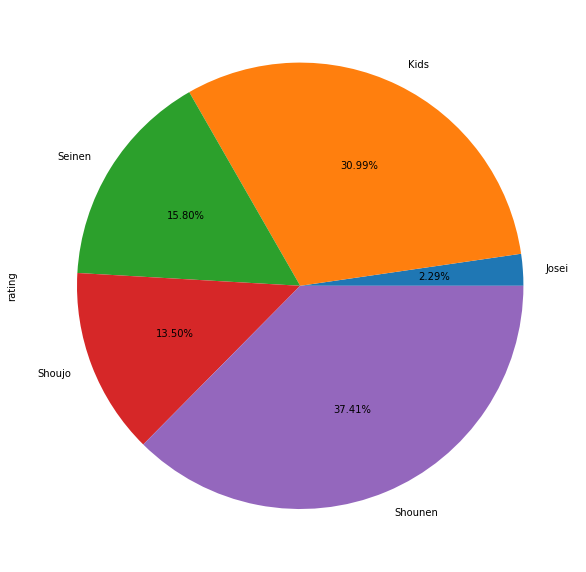

In [ ]:
anime_group = anime.groupby(['demographic'])['rating'].sum()
anime_group.plot.pie(figsize=(10,20), autopct="%.2f%%")

plt.savefig("Pie.pdf")